In [2]:
import pandas as pd
import numpy as np

# Membuat Data Kotor Buatan
data_kotor = {
    'Nama': ['Andi', 'Budi', 'Caca', 'Dedi', 'Eko', 'Feri', 'Gina', 'Hadi', 'Indah', 'Joko', 'Kiki', 'Lala'],
    'Gaji_Bulanan': [
        'Rp 5.000.000', 'Rp 6.500.000', 'Rp 15.000.000', # Format string
        'Rp 4.500.000', np.nan, 'Rp 18.000.000',         # Ada yang kosong (NaN)
        'Rp 5.200.000', 'Rp 7.000.000', 'Rp 14.500.000',
        'Rp 4.800.000', 'Rp 25.000.000', 'Rp 6.000.000'
    ],
    'Jam_Kerja_Sebulan': [
        160, 170, 250,  # Normal (160 jam = 8 jam x 20 hari)
        155, 160, 260,
        5000, 165, 240, # ERROR: 5000 jam itu mustahil (Typo/Outlier)
        150, 255, np.nan # Ada yang kosong
    ]
}

df = pd.DataFrame(data_kotor)
print("=== DATA AWAL (KOTOR) ===")
print(df)

=== DATA AWAL (KOTOR) ===
     Nama   Gaji_Bulanan  Jam_Kerja_Sebulan
0    Andi   Rp 5.000.000              160.0
1    Budi   Rp 6.500.000              170.0
2    Caca  Rp 15.000.000              250.0
3    Dedi   Rp 4.500.000              155.0
4     Eko            NaN              160.0
5    Feri  Rp 18.000.000              260.0
6    Gina   Rp 5.200.000             5000.0
7    Hadi   Rp 7.000.000              165.0
8   Indah  Rp 14.500.000              240.0
9    Joko   Rp 4.800.000              150.0
10   Kiki  Rp 25.000.000              255.0
11   Lala   Rp 6.000.000                NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Nama               12 non-null     object 
 1   Gaji_Bulanan       11 non-null     object 
 2   Jam_Kerja_Sebulan  11 non-null     float64
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


In [6]:
df.describe()

,Jam_Kerja_Sebulan
count,11.000000
mean,633.181818
std,1449.015653
min,150.000000
25%,160.000000
50%,170.000000
75%,252.500000
max,5000.000000


In [7]:
df

,Nama,Gaji_Bulanan,Jam_Kerja_Sebulan
0,Andi,Rp 5.000.000,160.0
1,Budi,Rp 6.500.000,170.0
2,Caca,Rp 15.000.000,250.0
3,Dedi,Rp 4.500.000,155.0
4,Eko,NaN,160.0
5,Feri,Rp 18.000.000,260.0
6,Gina,Rp 5.200.000,5000.0
7,Hadi,Rp 7.000.000,165.0
8,Indah,Rp 14.500.000,240.0
9,Joko,Rp 4.800.000,150.0


In [14]:
df['Gaji_Bulanan'] = df['Gaji_Bulanan'].str.replace('Rp', '').str.replace('.', '')
df

,Nama,Gaji_Bulanan,Jam_Kerja_Sebulan
0,Andi,5000000,160.0
1,Budi,6500000,170.0
2,Caca,15000000,250.0
3,Dedi,4500000,155.0
4,Eko,NaN,160.0
5,Feri,18000000,260.0
6,Gina,5200000,5000.0
7,Hadi,7000000,165.0
8,Indah,14500000,240.0
9,Joko,4800000,150.0


In [24]:
df['Gaji_Bulanan'] = pd.to_numeric(df['Gaji_Bulanan'])
df['Gaji_Bulanan'] = df['Gaji_Bulanan'].fillna(df['Gaji_Bulanan'].median())
df

,Nama,Gaji_Bulanan,Jam_Kerja_Sebulan
0,Andi,5000000.0,160.0
1,Budi,6500000.0,170.0
2,Caca,15000000.0,250.0
3,Dedi,4500000.0,155.0
4,Eko,6500000.0,160.0
5,Feri,18000000.0,260.0
6,Gina,5200000.0,5000.0
7,Hadi,7000000.0,165.0
8,Indah,14500000.0,240.0
9,Joko,4800000.0,150.0


<Axes: ylabel='Gaji_Bulanan'>

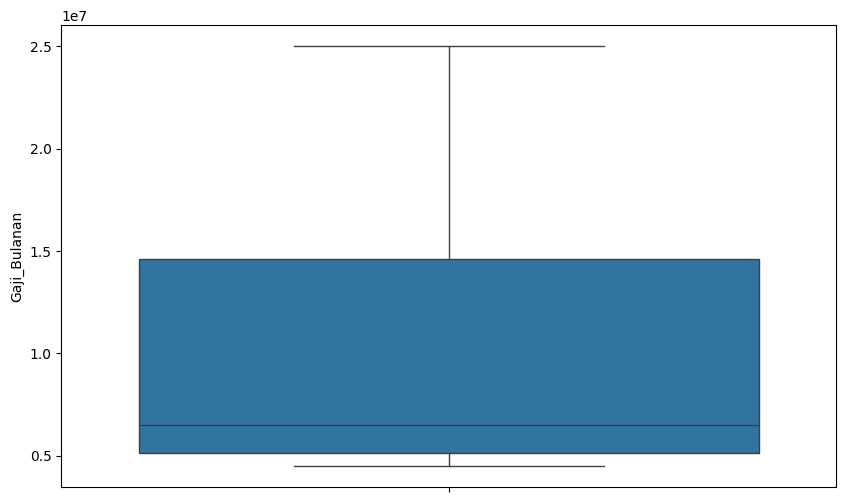

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(df['Gaji_Bulanan'])

In [26]:
df

,Nama,Gaji_Bulanan,Jam_Kerja_Sebulan
0,Andi,5000000.0,160.0
1,Budi,6500000.0,170.0
2,Caca,15000000.0,250.0
3,Dedi,4500000.0,155.0
4,Eko,6500000.0,160.0
5,Feri,18000000.0,260.0
6,Gina,5200000.0,5000.0
7,Hadi,7000000.0,165.0
8,Indah,14500000.0,240.0
9,Joko,4800000.0,150.0


In [27]:
df['Jam_Kerja_Sebulan'] = df['Jam_Kerja_Sebulan'].fillna(df['Jam_Kerja_Sebulan'].median())

In [28]:
df

,Nama,Gaji_Bulanan,Jam_Kerja_Sebulan
0,Andi,5000000.0,160.0
1,Budi,6500000.0,170.0
2,Caca,15000000.0,250.0
3,Dedi,4500000.0,155.0
4,Eko,6500000.0,160.0
5,Feri,18000000.0,260.0
6,Gina,5200000.0,5000.0
7,Hadi,7000000.0,165.0
8,Indah,14500000.0,240.0
9,Joko,4800000.0,150.0


In [35]:
df.isnull().sum()

Nama                 0
Gaji_Bulanan         0
Jam_Kerja_Sebulan    0
dtype: int64

In [36]:
numeric = df.select_dtypes('number').columns
numeric

Index(['Gaji_Bulanan', 'Jam_Kerja_Sebulan'], dtype='object')

In [44]:
q1 = df[numeric].quantile(0.25)
q3 = df[numeric].quantile(0.75)

iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

condition = ~((df[numeric] < lower) | (df[numeric] > upper)).any(axis=1)
numeric_features = df.loc[condition, numeric]

numeric_features

,Gaji_Bulanan,Jam_Kerja_Sebulan
0,5000000.0,160.0
1,6500000.0,170.0
2,15000000.0,250.0
3,4500000.0,155.0
4,6500000.0,160.0
5,18000000.0,260.0
7,7000000.0,165.0
8,14500000.0,240.0
9,4800000.0,150.0
10,25000000.0,255.0


/tmp/ipykernel_18839/3666776328.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(numeric_features['Gaji_Bulanan'], palette = 'viridis')
/tmp/ipykernel_18839/3666776328.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(numeric_features['Jam_Kerja_Sebulan'], palette = 'viridis')


<Axes: xlabel='Jam_Kerja_Sebulan', ylabel='Count'>

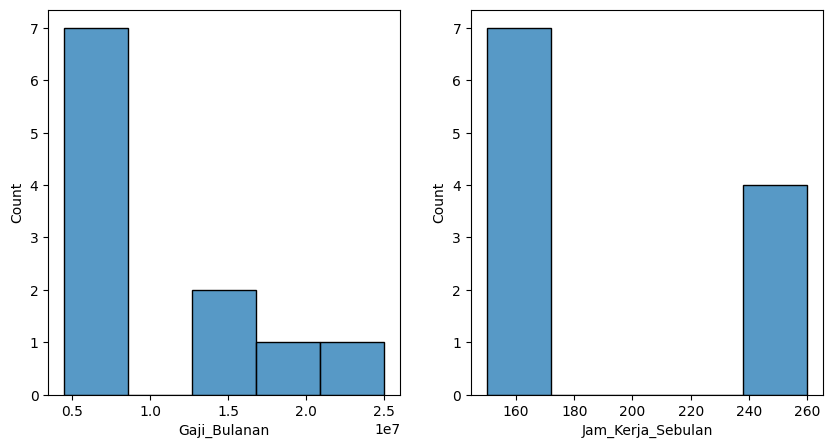

In [52]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(numeric_features['Gaji_Bulanan'], palette = 'viridis')
plt.subplot(1, 2, 2)
sns.histplot(numeric_features['Jam_Kerja_Sebulan'], palette = 'viridis')

/tmp/ipykernel_18839/227665388.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(numeric_features['Gaji_Bulanan'], numeric_features['Jam_Kerja_Sebulan'], cmap = 'viridis')


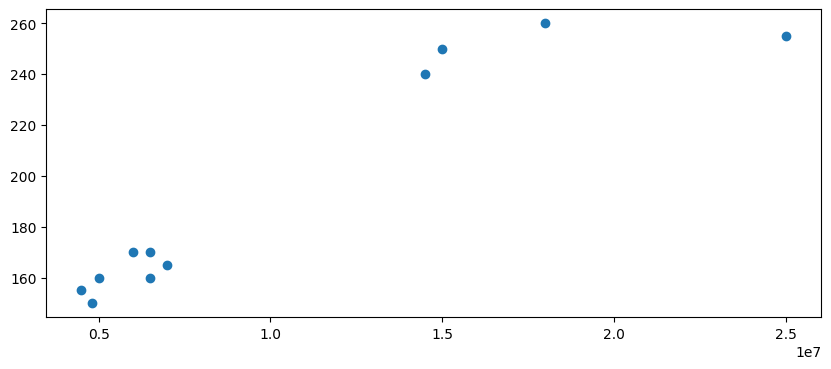

In [73]:
plt.figure(figsize=(10, 4))
plt.scatter(numeric_features['Gaji_Bulanan'], numeric_features['Jam_Kerja_Sebulan'], cmap = 'viridis')

In [54]:
df

,Nama,Gaji_Bulanan,Jam_Kerja_Sebulan
0,Andi,5000000.0,160.0
1,Budi,6500000.0,170.0
2,Caca,15000000.0,250.0
3,Dedi,4500000.0,155.0
4,Eko,6500000.0,160.0
5,Feri,18000000.0,260.0
6,Gina,5200000.0,5000.0
7,Hadi,7000000.0,165.0
8,Indah,14500000.0,240.0
9,Joko,4800000.0,150.0


In [64]:
from sklearn.preprocessing import StandardScaler
x = numeric_features.values

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
x_scaled[:5]

array([[-0.80789002, -0.77855137],
       [-0.57726397, -0.5501763 ],
       [ 0.72961694,  1.27682425],
       [-0.88476537, -0.89273891],
       [-0.57726397, -0.77855137]])

# Visualization and Clustering

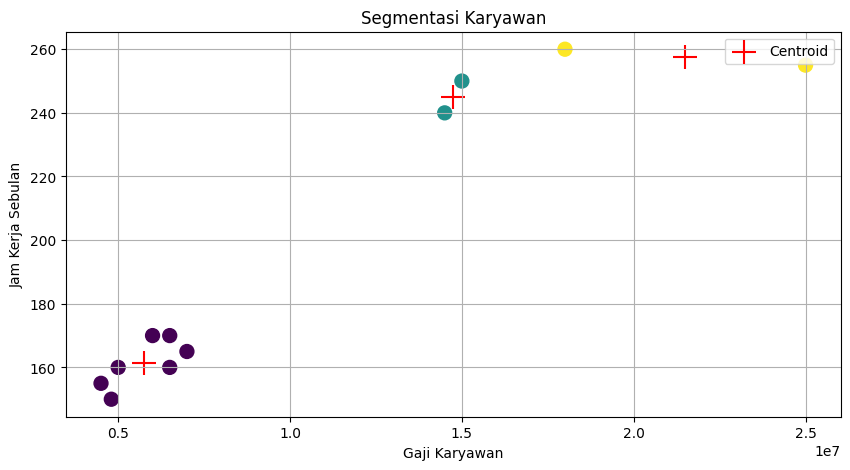

In [108]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(x_scaled)
labels = kmeans.labels_

numeric_features['kelompok'] = labels

centroid_scaler = kmeans.cluster_centers_
centroid = scaler.inverse_transform(centroid)

plt.figure(figsize=(10, 5))
plt.scatter(numeric_features['Gaji_Bulanan'], numeric_features['Jam_Kerja_Sebulan'], c=labels, s=100, cmap='viridis')
plt.scatter(centroid[:,0], centroid[:, 1], c = 'red', s=300, marker='+', label='Centroid')  
plt.legend() 
plt.title('Segmentasi Karyawan')
plt.xlabel('Gaji Karyawan')
plt.ylabel('Jam Kerja Sebulan')
plt.grid(True)
plt.show()

In [95]:
centroid

array([[-0.69147878, -0.74592636],
       [ 0.69117926,  1.16263672],
       [ 1.72899646,  1.44810555]])